# SARS-CoV-2 virus spread analysis using Python
----------------------

## Dataset Resources

- [Novel Coronavirus (COVID-19) Cases Data](https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases) compiled by the Johns Hopkins University Center for Systems Science and Engineering ([JHU CCSE](https://data.humdata.org/organization/jhucsse))
  - time_series_covid19_confirmed_global.csv
  - time_series_covid19_deaths_global.csv
  - time_series_covid19_recovered_global.csv


- [GDP (Gross Domestic Product) per capita](https://ourworldindata.org/grapher/gdp-per-capita-worldbank) published by World Bank – World Development Indicators
  - gdp-per-capita-worldbank.csv

## Modules

- [pandas](https://pandas.pydata.org/) (data analysis and manipulation)

- [numpy](https://numpy.org/) (scientific computing)

- [seaborn](https://seaborn.pydata.org/) (statistical data visualization)

- [matplotlib](https://matplotlib.org/) (visualizations)

## Note
- The latest datasets can be used (from the sources I mentioned above), as long as the files' structure hasn't been changed.
- Adjust the values in `.sort_values` method to the latest date in the datasets.
- Change the `name_country` in `.loc[country_name]` method to see the data of what country you want.
- `.head(1000)` lists all the rows in dataset. Change `1000` to the number of rows you want to list. `.head()` will list 5 rows by default.
- Use `dataset_name.shape` to see the number of rows and columns of the dataset.

## Table of content
- [Import modules](#Import-modules)
- **[Dataset: Confirmed cases](#Dataset:-Confirmed-cases)**
  - [Import file](#Dataset:-Confirmed-cases)
  - [Confirmed cases in specific countries](#Confirmed-cases-in-specific-countries)
  - [Countries with the highest confirmed cases](#Countries-with-the-highest-confirmed-cases)
  - [Countries with the lowest confirmed cases](#Countries-with-the-lowest-confirmed-cases)
  - [Look at the data in some specific countries about confirmed cases](#Look-at-the-data-in-some-specific-countries-about-confirmed-cases)
  - [Calculate the max_infection_rate of all countries and add to dataset_cases](#Calculate-the-max_infection_rate-of-all-countries-and-add-to-dataset_cases)
- **[Dataset: Deaths by COVID-19](#Dataset:-Deaths-by-COVID-19)**
  - [Import file](#Dataset:-Deaths-by-COVID-19)
  - [Deaths by COVID-19 in specific countries](#Deaths-by-COVID-19-in-specific-countries)
  - [Countries with the highest deaths by COVID-19](#Countries-with-the-highest-deaths-by-COVID-19)
  - [Look at data in some specific countries about deaths by COVID-19](#Look-at-data-in-some-specific-countries-about-deaths-by-COVID-19)
  - [Calculate the max_death_rate of all countries and add to dataset_deaths](#Calculate-the-max_death_rate-of-all-countries-and-add-to-dataset_deaths)
- **[Dataset: Recovered](#Dataset:-Recovered)**
  - [Import file](#Dataset:-Recovered)
  - [Recovered in specific countries](#Recovered-in-specific-countries)
  - [Countries with the highest recovered](#Countries-with-the-highest-recovered)
  - [Look at data in some specific countries about recovered](#Look-at-data-in-some-specific-countries-about-recovered)
  - [Calculate the max_recovery_rate of all countries and add to dataset_recovered](#Calculate-the-max_recovery_rate-of-all-countries-and-add-to-dataset_recovered)
- **[Dataset: GDP per capita](#Dataset:-GDP-per-capita)**
  - [Import file](#Dataset:-GDP-per-capita)
- **[Join all dataset into one](#Join-all-dataset-into-one)**
- **[Correlation Matrix](#Correlation-Matrix)**
- **[Visualization from data](#Visualization-from-data)**
  - [Recovery Rate](#Recovery-Rate)
  - [Graph: max_infection_rate and max_death_rate](#Graph:-max_infection_rate-and-max_death_rate)
  - [Graph: max_infection_rate and max_recovery_rate](#Graph:-max_infection_rate-and-max_recovery_rate)
  - [Graph: gdp_per_capita and max_infection_rate](#Graph:-gdp_per_capita-and-max_infection_rate)
  - [Graph: gdp_per_capita and max_recovery_rate](#Graph:-gdp_per_capita-and-max_recovery_rate)

## Import modules

In [1]:
!pip3 install seaborn
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('All modules are imported successfully!')

All modules are imported successfully!


## Dataset: Confirmed cases

### Import file

Import `time_series_covid19_confirmed_global.csv`

In [2]:
# Importing data
dataset_cases = pd.read_csv("time_series_covid19_confirmed_global.csv")

# Filter
# dataset = dataset[dataset.date.eq("2020-09-18")]

# Delete useless column
dataset_cases.drop(["Lat", "Long", "Province/State"],axis=1, inplace=True)

# Set index
# dataset.set_index("Country/Region", inplace=True)
dataset_cases = dataset_cases.groupby("Country/Region").sum()

dataset_cases.head(1000)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883
Albania,0,0,0,0,0,0,0,0,0,0,...,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073
Algeria,0,0,0,0,0,0,0,0,0,0,...,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413
Andorra,0,0,0,0,0,0,0,0,0,0,...,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564
Angola,0,0,0,0,0,0,0,0,0,0,...,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,27919,28664,29256,29906,30574,31362,32250,33006,33843,34401
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,1999,2003,2007,2009,2011,2013,2016,2019,2022,2024


In [3]:
# This dataset_cases_filtered will be used later
dataset_cases_filtered = pd.DataFrame(dataset_cases["9/18/20"])
# Rename
dataset_cases_filtered = dataset_cases_filtered.rename(columns={'9/18/20': 'confirmed_cases'})

### Confirmed cases in specific countries

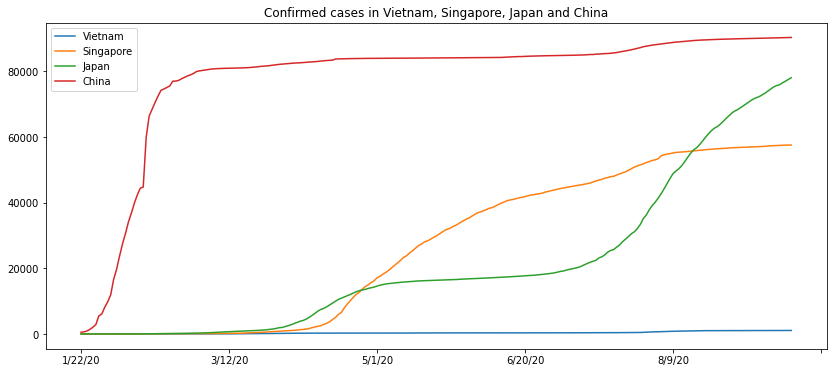

In [4]:
dataset_cases.loc["Vietnam"].plot(figsize=(14, 6), legend = True, title = 'Confirmed cases in Vietnam, Singapore, Japan and China')
dataset_cases.loc["Singapore"].plot()
dataset_cases.loc["Japan"].plot()
dataset_cases.loc["China"].plot()
# Identify which line belong to which country
plt.legend()

*Confirmed cases in Vietnam, Singapore, Japan and China*

### Countries with the highest confirmed cases

Sort the `dataset_cases` descending by the value in the newest column.

In [5]:
# Sort the dataset descending
dataset_cases = dataset_cases.sort_values(by=['9/18/20'], ascending=False)
dataset_cases.head(1000)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,6360212,6396100,6443652,6485123,6520122,6553652,6592342,6630051,6674411,6723933
India,0,0,0,0,0,0,0,0,1,1,...,4465863,4562414,4659984,4754356,4846427,4930236,5020359,5118253,5214677,5214677
Brazil,0,0,0,0,0,0,0,0,0,0,...,4197889,4238446,4282164,4315687,4330455,4345610,4382263,4419083,4455386,4495183
Russia,0,0,0,0,0,0,0,0,0,2,...,1037526,1042836,1048257,1053663,1059024,1064438,1069873,1075485,1081152,1086955
Colombia,0,0,0,0,0,0,0,0,0,0,...,686851,694664,702088,708964,716319,721892,728590,736377,743945,750471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laos,0,0,0,0,0,0,0,0,0,0,...,22,22,23,23,23,23,23,23,23,23
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
Holy See,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


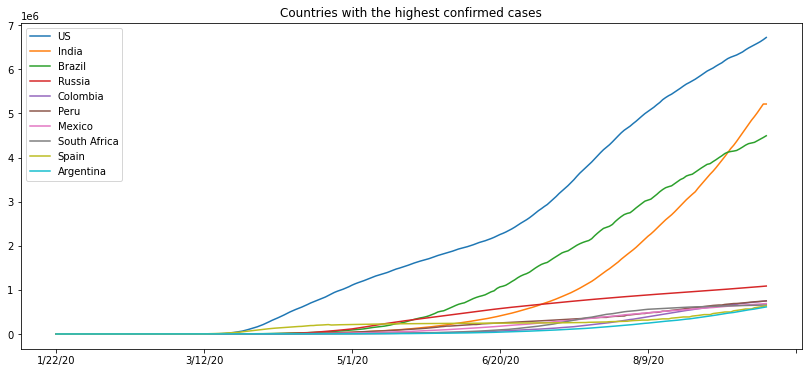

In [6]:
# Cast the index of dataframe (name of countries) into list
countries = list(dataset_cases.index)

# List 10 countries with the highest confirmed cases
count = 0
for country in countries:
    dataset_cases.loc[country].plot(figsize=(14, 6), legend = True, title = 'Countries with the highest confirmed cases')
    count += 1
    if count == 10:
        break

plt.legend()

*Countries with the highest confirmed cases*

### Countries with the lowest confirmed cases

In [7]:
# Sort the dataset ascending
dataset_cases = dataset_cases.sort_values(by=['9/18/20'])
dataset_cases.head(1000)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
MS Zaandam,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Holy See,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
Laos,0,0,0,0,0,0,0,0,0,0,...,22,22,23,23,23,23,23,23,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Colombia,0,0,0,0,0,0,0,0,0,0,...,686851,694664,702088,708964,716319,721892,728590,736377,743945,750471
Russia,0,0,0,0,0,0,0,0,0,2,...,1037526,1042836,1048257,1053663,1059024,1064438,1069873,1075485,1081152,1086955
Brazil,0,0,0,0,0,0,0,0,0,0,...,4197889,4238446,4282164,4315687,4330455,4345610,4382263,4419083,4455386,4495183


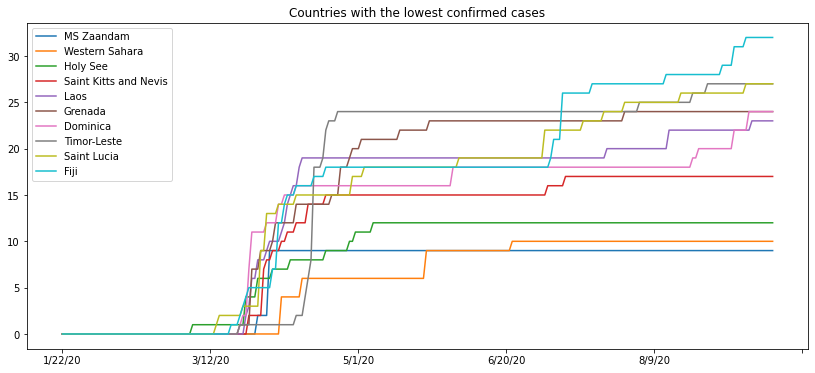

In [8]:
# Cast the index of dataframe (name of countries) into list
countries = list(dataset_cases.index)

# List 10 countries with the lowest confirmed cases
count = 0
for country in countries:
    dataset_cases.loc[country].plot(figsize=(14, 6), legend = True, title = 'Countries with the lowest confirmed cases')
    count += 1
    if count == 10:
        break

plt.legend()

*Countries with the lowest confirmed cases*

### Look at the data in some specific countries about confirmed cases
Calculate the first derivative to see the spread rate

#### Infection rate in Vietnam

<AxesSubplot:title={'center':'Infection rate in Vietnam'}>

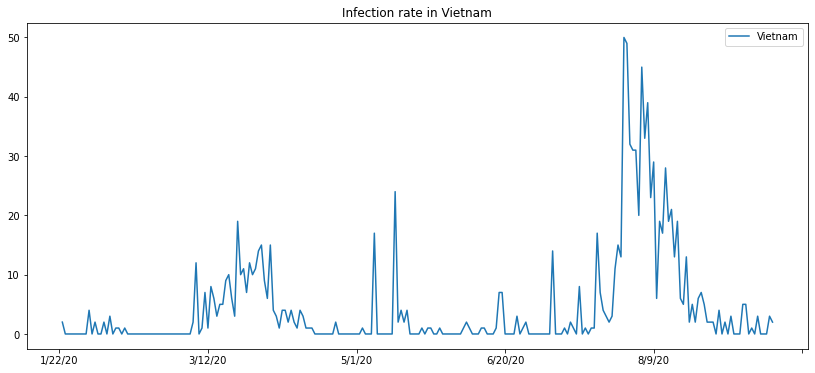

In [9]:
# Calculate the first derivative of the curve
dataset_cases.loc["Vietnam"].diff().plot(figsize=(14, 6), legend = True, title = 'Infection rate in Vietnam')

In [10]:
# Find the max_infection_rate for Vietnam
dataset_cases.loc["Vietnam"].diff().max()

50.0

The `max_infection_rate` in Vietnam is **50.0**

#### Compare the Infection rate in some countries: Vietnam, United State, Italy, Japan and China

<AxesSubplot:title={'center':'Compare the Infection rate in some countries: Vietnam, United State, Italy, Japan and China'}>

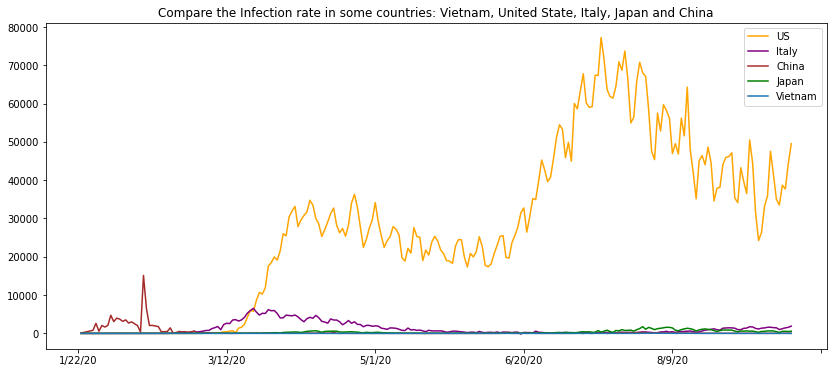

In [11]:
# Calculate the first derivative of the curve

dataset_cases.loc["US"].diff().plot(figsize=(14, 6), legend = True, color = 'orange', title = 'Compare the Infection rate in some countries: Vietnam, United State, Italy, Japan and China')
dataset_cases.loc["Italy"].diff().plot(legend = True, color = 'purple')
dataset_cases.loc["China"].diff().plot(legend = True, color = 'brown')
dataset_cases.loc["Japan"].diff().plot(legend = True, color = 'green')
dataset_cases.loc["Vietnam"].diff().plot(legend = True)

In [12]:
# Find the max_infection_rate for US
dataset_cases.loc["US"].diff().max()

77255.0

The `max_infection_rate` in US is **77255.0**

### Calculate the `max_infection_rate` of all countries and add to `dataset_cases`

In [13]:
# Cast the index of dataframe (name of countries) into list
countries = list(dataset_cases.index)

#Calculate max_infection_rate of all countries
max_infection_rate = []
for country in countries:
    max_infection_rate.append(dataset_cases.loc[country].diff().max())

#Add new column
dataset_cases["max_infection_rate"] = max_infection_rate

dataset_cases.head(1000)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
MS Zaandam,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,7.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,4.0
Holy See,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,3.0
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,5.0
Laos,0,0,0,0,0,0,0,0,0,0,...,22,23,23,23,23,23,23,23,23,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Colombia,0,0,0,0,0,0,0,0,0,0,...,694664,702088,708964,716319,721892,728590,736377,743945,750471,15318.0
Russia,0,0,0,0,0,0,0,0,0,2,...,1042836,1048257,1053663,1059024,1064438,1069873,1075485,1081152,1086955,11656.0
Brazil,0,0,0,0,0,0,0,0,0,0,...,4238446,4282164,4315687,4330455,4345610,4382263,4419083,4455386,4495183,69074.0


In [14]:
# Keep needed column
dataset_cases = pd.DataFrame(dataset_cases["max_infection_rate"])

dataset_cases.head(1000)

,max_infection_rate
Country/Region,
MS Zaandam,7.0
Western Sahara,4.0
Holy See,3.0
Saint Kitts and Nevis,5.0
Laos,3.0
...,...
Colombia,15318.0
Russia,11656.0
Brazil,69074.0


## Dataset: Deaths by COVID-19

### Import file

Import `time_series_covid19_deaths_global.csv`

In [15]:
# Importing data
dataset_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

# Delete useless column
dataset_deaths.drop(["Lat", "Long", "Province/State"],axis=1, inplace=True)

# Set index
# dataset.set_index("Country/Region", inplace=True)
dataset_deaths = dataset_deaths.groupby("Country/Region").sum()

dataset_deaths.head(1000)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437
Albania,0,0,0,0,0,0,0,0,0,0,...,322,324,327,330,334,338,340,343,347,353
Algeria,0,0,0,0,0,0,0,0,0,0,...,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659
Andorra,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
Angola,0,0,0,0,0,0,0,0,0,0,...,126,130,131,132,134,136,139,143,144,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,192,198,204,210,221,226,229,243,244,250
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Yemen,0,0,0,0,0,0,0,0,0,0,...,576,580,582,582,583,583,583,583,585,585


Sort the `dataset_deaths` descending by the value in the newest column.

In [16]:
dataset_deaths = dataset_deaths.sort_values(by=['9/18/20'], ascending=False)
dataset_deaths.head(1000)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,190859,191766,192979,193693,194071,194493,195781,196763,197633,198570
Brazil,0,0,0,0,0,0,0,0,0,0,...,128539,129522,130396,131210,131625,132006,133119,134106,134935,135793
India,0,0,0,0,0,0,0,0,0,0,...,75062,76271,77472,78586,79722,80776,82066,83198,84372,84372
Mexico,0,0,0,0,0,0,0,0,0,0,...,69049,69649,70183,70604,70821,71049,71678,71978,72179,72803
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,41683,41697,41703,41712,41717,41726,41753,41773,41794,41821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cambodia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Holy See,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Deaths by COVID-19 in specific countries

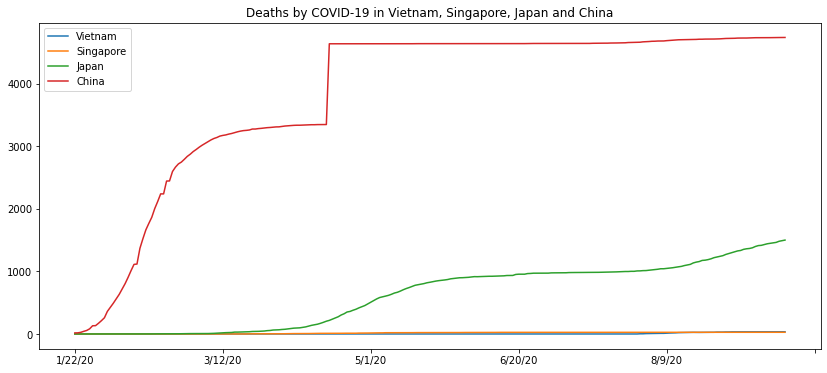

In [17]:
dataset_deaths.loc["Vietnam"].plot(figsize=(14, 6), legend = True, title = 'Deaths by COVID-19 in Vietnam, Singapore, Japan and China')
dataset_deaths.loc["Singapore"].plot()
dataset_deaths.loc["Japan"].plot()
dataset_deaths.loc["China"].plot()
# Identify which line belong to which country
plt.legend()

*Deaths by COVID-19 in Vietnam, Singapore, Japan and China*

### Countries with the highest deaths by COVID-19

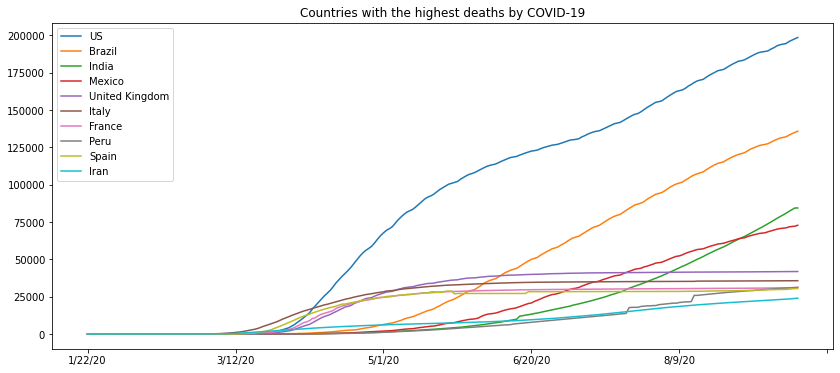

In [18]:
# Cast the index of dataframe (name of countries) into list
countries = list(dataset_deaths.index)

# List 10 countries with the highest deaths by COVID-19
count = 0
for country in countries:
    dataset_deaths.loc[country].plot(figsize=(14, 6), legend = True, title = 'Countries with the highest deaths by COVID-19')
    count += 1
    if count == 10:
        break

plt.legend()

*Countries with the highest deaths by COVID-19*

### Look at data in some specific countries about deaths by COVID-19

#### Death by COVID-19 rate in Vietnam

<AxesSubplot:title={'center':'Death by COVID-19 rate in Vietnam'}>

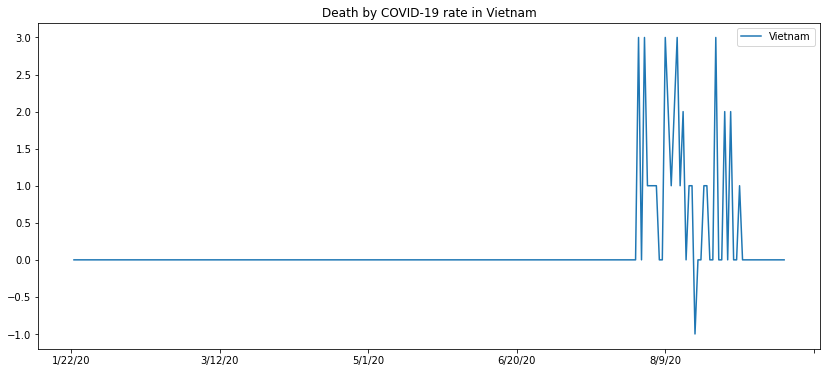

In [19]:
# Calculate the first derivative of the curve
dataset_deaths.loc["Vietnam"].diff().plot(figsize=(14, 6), legend = True, title = 'Death by COVID-19 rate in Vietnam')

In [20]:
dataset_deaths.loc["Vietnam"].diff().max()

3.0

The `max_death_rate` in Vietnam is **3.0**

#### Compare the deaths rate in some countries: Vietnam, United State, Italy, Japan and China

<AxesSubplot:title={'center':'Compare the deaths rate in some countries: Vietnam, United State, Italy, Japan and China'}>

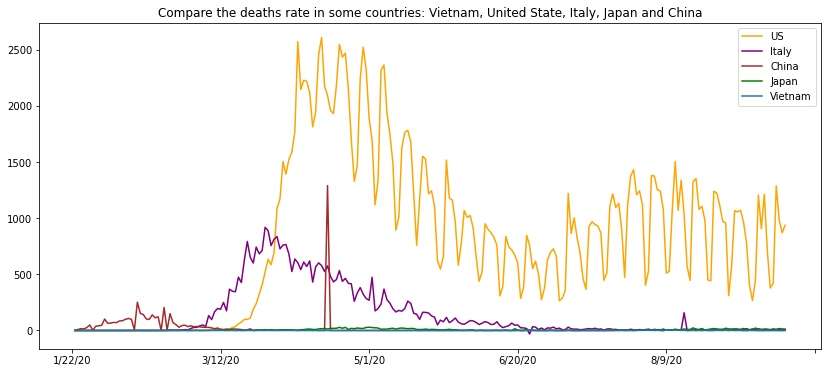

In [21]:
# Calculate the first derivative of the curve
dataset_deaths.loc["US"].diff().plot(figsize=(14, 6), legend = True, color = 'orange', title = 'Compare the deaths rate in some countries: Vietnam, United State, Italy, Japan and China')
dataset_deaths.loc["Italy"].diff().plot(legend = True, color = 'purple')
dataset_deaths.loc["China"].diff().plot(legend = True, color = 'brown')
dataset_deaths.loc["Japan"].diff().plot(legend = True, color = 'green')
dataset_deaths.loc["Vietnam"].diff().plot(legend = True)

In [22]:
dataset_deaths.loc["US"].diff().max()

2609.0

The `max_death_rate` in US is **2609.0**

### Calculate the `max_death_rate` of all countries and add to `dataset_deaths`

In [23]:
# Cast the index of dataframe (name of countries) into list
countries = list(dataset_deaths.index)

# Calculate the max_death_rate of all countries
max_death_rate = []
for country in countries:
    max_death_rate.append(dataset_deaths.loc[country].diff().max())

#Add new column
dataset_deaths["max_death_rate"] = max_death_rate

dataset_deaths.head(1000)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,191766,192979,193693,194071,194493,195781,196763,197633,198570,2609.0
Brazil,0,0,0,0,0,0,0,0,0,0,...,129522,130396,131210,131625,132006,133119,134106,134935,135793,1595.0
India,0,0,0,0,0,0,0,0,0,0,...,76271,77472,78586,79722,80776,82066,83198,84372,84372,2003.0
Mexico,0,0,0,0,0,0,0,0,0,0,...,69649,70183,70604,70821,71049,71678,71978,72179,72803,1092.0
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,41697,41703,41712,41717,41726,41753,41773,41794,41821,1224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cambodia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Holy See,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [24]:
# Keep needed column
dataset_deaths = pd.DataFrame(dataset_deaths["max_death_rate"])

dataset_deaths.head(1000)

,max_death_rate
Country/Region,
US,2609.0
Brazil,1595.0
India,2003.0
Mexico,1092.0
United Kingdom,1224.0
...,...
Cambodia,0.0
Holy See,0.0
Saint Kitts and Nevis,0.0


## Dataset: Recovered

### Import file

Import `time_series_covid19_recovered_global.csv`

In [25]:
# Importing data
dataset_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

# Delete useless column
dataset_recovered.drop(["Lat", "Long", "Province/State"],axis=1, inplace=True)

# Set index
# dataset.set_index("Country/Region", inplace=True)
dataset_recovered = dataset_recovered.groupby("Country/Region").sum()

dataset_recovered.head(1000)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,31048,31129,31154,31234,31638,32073,32098,32503,32505,32576
Albania,0,0,0,0,0,0,0,0,0,0,...,6284,6346,6443,6494,6569,6615,6668,6733,6788,6831
Algeria,0,0,0,0,0,0,0,0,0,0,...,33379,33562,33723,33875,34037,34204,34385,34517,34675,34818
Andorra,0,0,0,0,0,0,0,0,0,0,...,938,938,943,943,943,945,945,1054,1054,1164
Angola,0,0,0,0,0,0,0,0,0,0,...,1245,1277,1288,1289,1301,1324,1332,1401,1405,1443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,18466,18821,19788,19979,20082,21406,21804,22209,23060,23333
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
Yemen,0,0,0,0,0,0,0,0,0,0,...,1209,1211,1211,1211,1212,1215,1219,1221,1221,1221


In [26]:
# This dataset_recovered_filtered will be used with dataset_cases_filtered we created in Confirmed Cases Import file
dataset_recovered_filtered = pd.DataFrame(dataset_recovered["9/18/20"])
# Rename
dataset_recovered_filtered = dataset_recovered_filtered.rename(columns={'9/18/20': 'recovered'})

Sort the `dataset_recovered` descending by the value in the newest column.

In [27]:
dataset_recovered = dataset_recovered.sort_values(by=['9/18/20'], ascending=False)
dataset_recovered.head(1000)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0,0,0,0,0,0,0,0,0,0,...,3471783,3542663,3624196,3702595,3780107,3859399,3942360,4025079,4112551,4112551
Brazil,0,0,0,0,0,0,0,0,0,0,...,3611632,3657701,3695158,3723206,3723206,3770138,3811505,3845464,3873934,3897539
US,0,0,0,0,0,0,0,0,0,0,...,2387479,2403511,2417878,2434658,2451406,2474570,2495127,2525573,2540334,2556465
Russia,0,0,0,0,0,0,0,0,0,0,...,854069,859961,865646,871000,873684,876152,881693,887457,893145,898420
Colombia,0,0,0,0,0,0,0,0,0,0,...,552885,569479,582694,592820,599385,606925,607978,610078,615457,615457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Holy See,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
Sweden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Recovered in specific countries

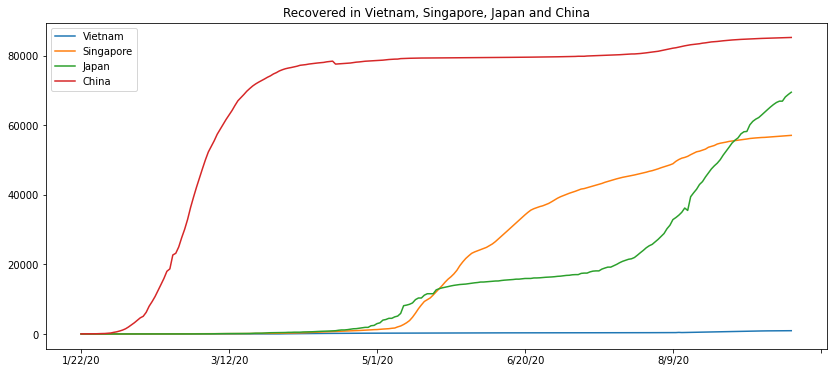

In [28]:
dataset_recovered.loc["Vietnam"].plot(figsize=(14, 6), legend = True, title = 'Recovered in Vietnam, Singapore, Japan and China')
dataset_recovered.loc["Singapore"].plot()
dataset_recovered.loc["Japan"].plot()
dataset_recovered.loc["China"].plot()
# Identify which line belong to which country
plt.legend()

*Recovered in Vietnam, Singapore, Japan and China*

### Countries with the highest recovered

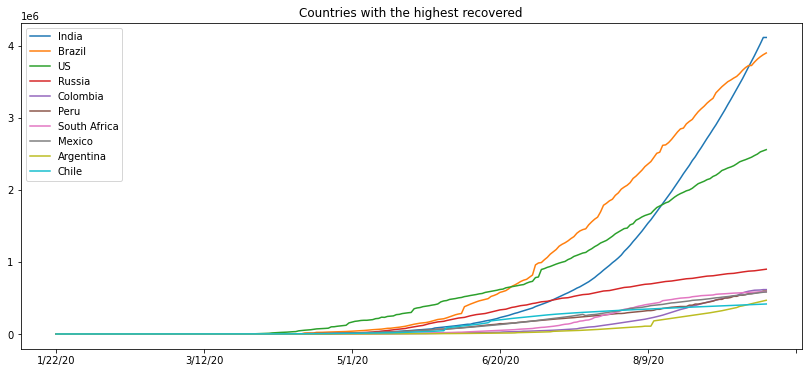

In [29]:
# Cast the index of dataframe (name of countries) into list
countries = list(dataset_recovered.index)

# List 10 countries with the highest recovered
count = 0
for country in countries:
    dataset_recovered.loc[country].plot(figsize=(14, 6), legend = True, title = 'Countries with the highest recovered')
    count += 1
    if count == 10:
        break

plt.legend()

*Countries with the highest recovered*

### Look at data in some specific countries about recovered

#### Recovery rate in Vietnam

<AxesSubplot:title={'center':'Recovered rate in Vietnam'}>

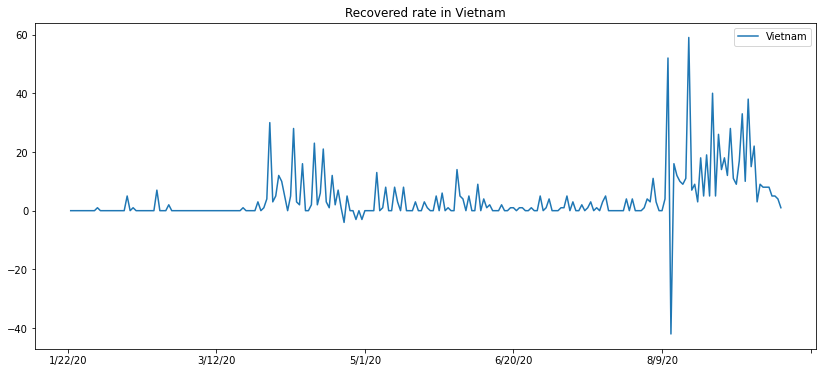

In [30]:
# Calculate the first derivative of the curve
dataset_recovered.loc["Vietnam"].diff().plot(figsize=(14, 6), legend = True, title = 'Recovered rate in Vietnam')

In [31]:
dataset_recovered.loc["Vietnam"].diff().max()

59.0

The `max_recovery_rate` in Vietnam is **59.0**

#### Recovery rate in United State

<AxesSubplot:title={'center':'Recovery rate in United State'}>

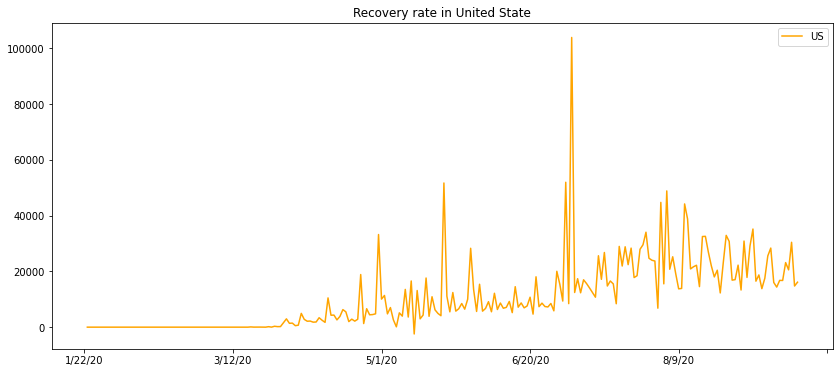

In [32]:
# Calculate the first derivative of the curve
dataset_recovered.loc["US"].diff().plot(figsize=(14, 6), legend = True, color = 'orange', title = 'Recovery rate in United State')

In [33]:
dataset_recovered.loc["US"].diff().max()

103921.0

The `max_recovery_rate` in US is **103921.0**

### Calculate the `max_recovery_rate` of all countries and add to `dataset_recovered`

In [34]:
# Cast the index of dataframe (name of countries) into list
countries = list(dataset_recovered.index)

# Calculate the max_recovery_rate
max_recovery_rate = []
for country in countries:
    max_recovery_rate.append(dataset_recovered.loc[country].diff().max())

#Add new column
dataset_recovered["max_recovery_rate"] = max_recovery_rate

dataset_recovered.head(1000)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,max_recovery_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0,0,0,0,0,0,0,0,0,0,...,3542663,3624196,3702595,3780107,3859399,3942360,4025079,4112551,4112551,87472.0
Brazil,0,0,0,0,0,0,0,0,0,0,...,3657701,3695158,3723206,3723206,3770138,3811505,3845464,3873934,3897539,140050.0
US,0,0,0,0,0,0,0,0,0,0,...,2403511,2417878,2434658,2451406,2474570,2495127,2525573,2540334,2556465,103921.0
Russia,0,0,0,0,0,0,0,0,0,0,...,859961,865646,871000,873684,876152,881693,887457,893145,898420,12375.0
Colombia,0,0,0,0,0,0,0,0,0,0,...,569479,582694,592820,599385,606925,607978,610078,615457,615457,23868.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Holy See,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,10.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,5.0
Sweden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [35]:
# Keep needed column
dataset_recovered = pd.DataFrame(dataset_recovered["max_recovery_rate"])

dataset_recovered.head(1000)

,max_recovery_rate
Country/Region,
India,87472.0
Brazil,140050.0
US,103921.0
Russia,12375.0
Colombia,23868.0
...,...
Holy See,10.0
Western Sahara,5.0
Sweden,0.0


## Dataset: GDP per capita

### Import file

Import `gdp-per-capita-worldbank.csv`

In [36]:
# Importing data
dataset_country = pd.read_csv("gdp-per-capita-worldbank.csv")

# Filter
dataset_country = dataset_country[dataset_country.Year.eq(2017)]

# Delete useless column
dataset_country.drop(["Code", "Year"],axis=1, inplace=True)

# Rename
dataset_country = dataset_country.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'gdp_per_capita'})

# Set index
dataset_country.set_index("Entity", inplace=True)

dataset_country.head(1000)

,gdp_per_capita
Entity,
Afghanistan,1803.987487
Albania,11803.430594
Algeria,13913.839363
Angola,5819.494971
Antigua and Barbuda,21490.942659
...,...
Vanuatu,2921.908676
Vietnam,6171.884192
World,15469.207236


## Join all dataset into one

In [37]:
data = dataset_cases
data = data.join(dataset_deaths, how="inner")
data = data.join(dataset_recovered, how="inner")
data.head(1000)

,max_infection_rate,max_death_rate,max_recovery_rate
Country/Region,,,
MS Zaandam,7.0,2.0,0.0
Western Sahara,4.0,1.0,5.0
Holy See,3.0,0.0,10.0
Saint Kitts and Nevis,5.0,0.0,4.0
Laos,3.0,0.0,4.0
...,...,...,...
Colombia,15318.0,442.0,23868.0
Russia,11656.0,232.0,12375.0
Brazil,69074.0,1595.0,140050.0


In [38]:
data = data.join(dataset_country, how="inner")
data.head(1000)

,max_infection_rate,max_death_rate,max_recovery_rate,gdp_per_capita
Saint Kitts and Nevis,5.0,0.0,4.0,24654.385401
Laos,3.0,0.0,4.0,6397.359825
Grenada,6.0,0.0,6.0,13593.876918
Dominica,5.0,0.0,4.0,9673.366962
Saint Lucia,6.0,0.0,7.0,12951.838877
...,...,...,...,...
Peru,21358.0,4143.0,18627.0,12236.706152
Colombia,15318.0,442.0,23868.0,13254.949218
Russia,11656.0,232.0,12375.0,24765.953634
Brazil,69074.0,1595.0,140050.0,14103.451531


In [39]:
# Remove the rows don't have data
data = data[data.gdp_per_capita.notnull()]
data = data[data.gdp_per_capita != 0]
data.head(1000)

,max_infection_rate,max_death_rate,max_recovery_rate,gdp_per_capita
Saint Kitts and Nevis,5.0,0.0,4.0,24654.385401
Laos,3.0,0.0,4.0,6397.359825
Grenada,6.0,0.0,6.0,13593.876918
Dominica,5.0,0.0,4.0,9673.366962
Saint Lucia,6.0,0.0,7.0,12951.838877
...,...,...,...,...
Peru,21358.0,4143.0,18627.0,12236.706152
Colombia,15318.0,442.0,23868.0,13254.949218
Russia,11656.0,232.0,12375.0,24765.953634
Brazil,69074.0,1595.0,140050.0,14103.451531


## Correlation Matrix

Correlation coefficients between `max_infection_rate`, `max_death_rate`, `max_recovery_rate` and `gdp_per_capita`

In [40]:
# Correlation Matrix
data.corr()

,max_infection_rate,max_death_rate,max_recovery_rate,gdp_per_capita
max_infection_rate,1.000000,0.582025,0.798164,-0.013862
max_death_rate,0.582025,1.000000,0.436201,-0.003541
max_recovery_rate,0.798164,0.436201,1.000000,-0.009103
gdp_per_capita,-0.013862,-0.003541,-0.009103,1.000000


# Visualization from data
________________________

### Recovery Rate

Join the `dataset_cases_filtered` and `dataset_recovered_filtered` into `data_filtered`

In [41]:
# Join the dataset_cases_filtered and dataset_recovered_filtered into data_filtered
data_filtered = dataset_cases_filtered
data_filtered = data_filtered.join(dataset_recovered_filtered, how="inner")
data_filtered.head(1000)

,confirmed_cases,recovered
Country/Region,,
Afghanistan,38883,32576
Albania,12073,6831
Algeria,49413,34818
Andorra,1564,1164
Angola,3848,1443
...,...,...
West Bank and Gaza,34401,23333
Western Sahara,10,8
Yemen,2024,1221


Calculate the `recovery_rate` column by dividing the `recovered` by the `confirmed_cases`

<AxesSubplot:title={'center':'Confirmed cases of all countries'}, xlabel='Country/Region'>

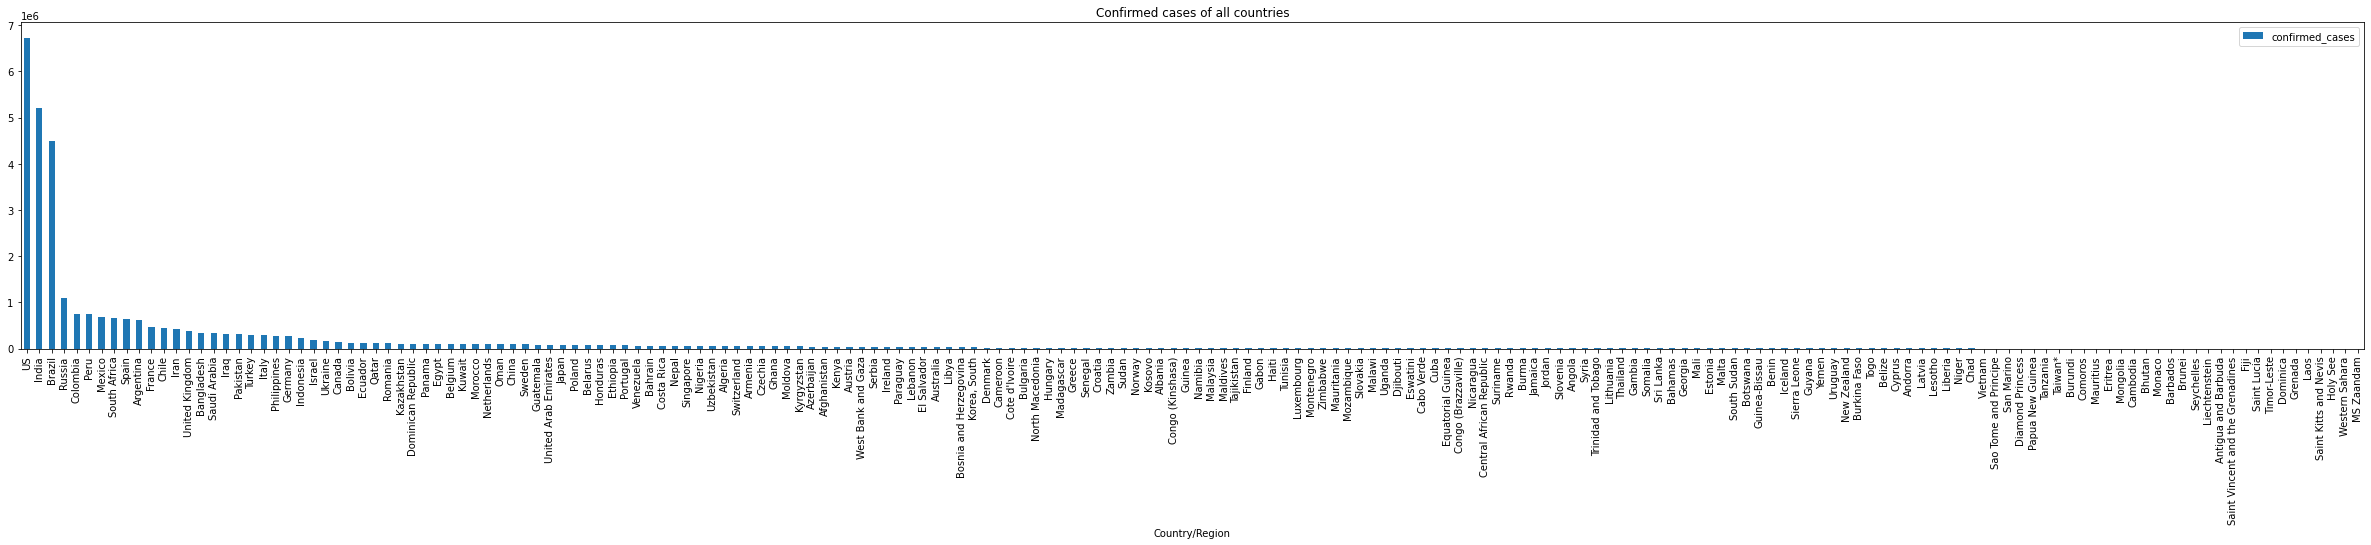

In [42]:
temp_data_filtered = data_filtered.sort_values(by=['confirmed_cases'], ascending=False)
temp_data_filtered["confirmed_cases"].plot(kind = 'bar', figsize=(42, 6), legend = True, title = 'Confirmed cases of all countries')

*Confirmed cases of all countries*

In [43]:
# Calculate the recovery_rate column by dividing the recovered by the confirmed_cases
# recovery_rate <= 1
data_filtered["recovery_rate"] = data_filtered["recovered"] / data_filtered["confirmed_cases"]

# Sort the data_filtered by the value of recovery_rate
data_filtered = data_filtered.sort_values(by=['recovery_rate'], ascending=False)

data_filtered.head(1000)

,confirmed_cases,recovered,recovery_rate
Country/Region,,,
Saint Kitts and Nevis,17,17,1.000000
Holy See,12,12,1.000000
Saint Vincent and the Grenadines,64,64,1.000000
Grenada,24,24,1.000000
Cambodia,275,274,0.996364
...,...,...,...
Netherlands,94345,2716,0.028788
United Kingdom,388416,2213,0.005697
Sweden,88237,0,0.000000


<AxesSubplot:title={'center':'Recovery rate of all countries'}, xlabel='Country/Region'>

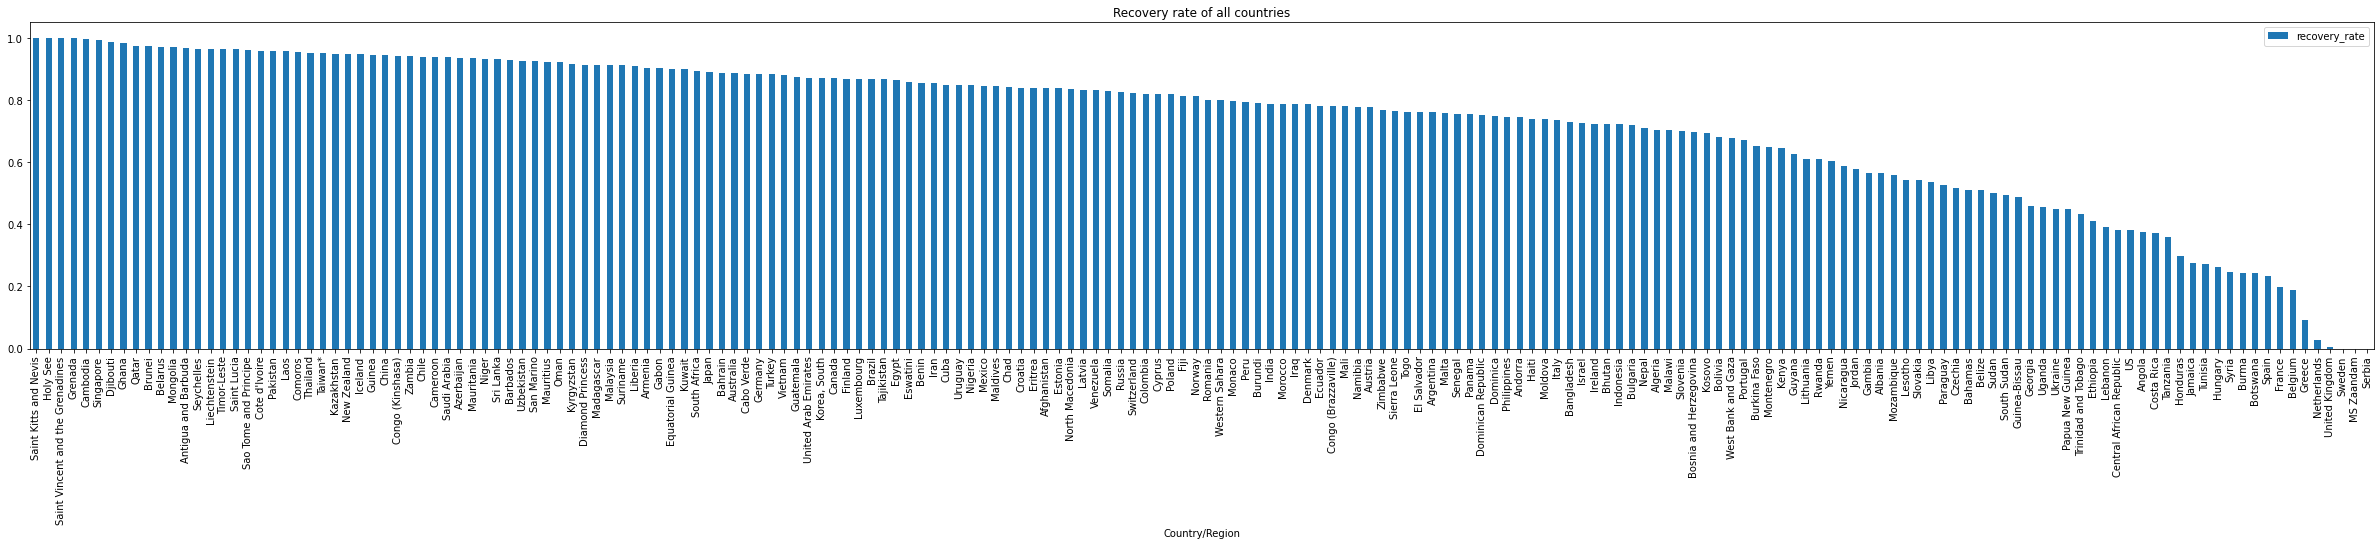

In [44]:
data_filtered["recovery_rate"].plot(kind = 'bar', figsize=(42, 6), legend = True, title = 'Recovery rate of all countries')

*Recovery rate of all countries*

### Graph: `max_infection_rate` and `max_death_rate`

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_infection_rate', ylabel='max_death_rate'>

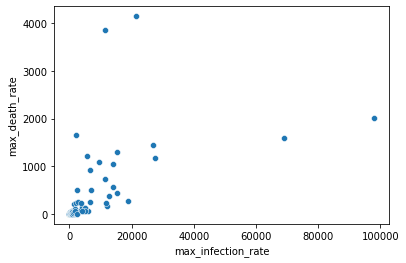

In [45]:
x = data["max_infection_rate"]
y = data["max_death_rate"]
# sns.scatterplot(x,y)
# np.log(y) make the graph easier to read, larger scale
sns.scatterplot(x, y)

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_infection_rate', ylabel='max_death_rate'>

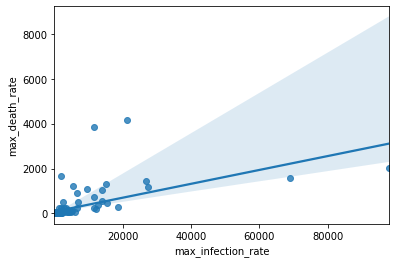

In [46]:
sns.regplot(x, y)

### Graph: `max_infection_rate` and `max_recovery_rate`

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_infection_rate', ylabel='max_recovery_rate'>

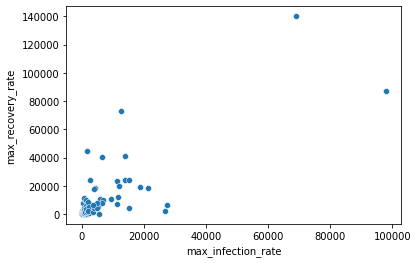

In [47]:
x = data["max_infection_rate"]
y = data["max_recovery_rate"]
# sns.scatterplot(x,y)
# np.log(y) make the graph easier to read, larger scale
sns.scatterplot(x, y)

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_infection_rate', ylabel='max_recovery_rate'>

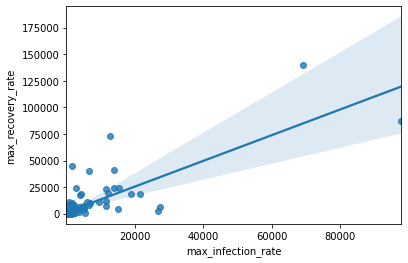

In [48]:
sns.regplot(x, y)

### Graph: `gdp_per_capita` and `max_infection_rate`

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdp_per_capita', ylabel='max_infection_rate'>

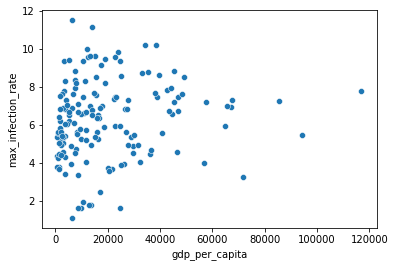

In [49]:
x = data["gdp_per_capita"]
y = data["max_infection_rate"]
# sns.scatterplot(x,y)
# np.log(y) make the graph easier to read, larger scale
sns.scatterplot(x, np.log(y))

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdp_per_capita', ylabel='max_infection_rate'>

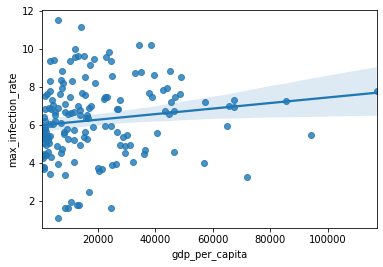

In [50]:
sns.regplot(x, np.log(y))

> ##### The result shows that people who are living developed country (higher GDP per capita) are more prone to get infection of SarsCoV2 virus

### Graph: `gdp_per_capita` and `max_recovery_rate`

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdp_per_capita', ylabel='max_recovery_rate'>

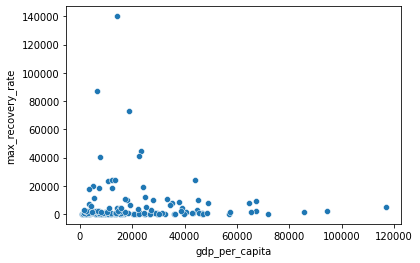

In [51]:
x = data["gdp_per_capita"]
y = data["max_recovery_rate"]
# sns.scatterplot(x,y)
# np.log(y) make the graph easier to read, larger scale
sns.scatterplot(x, y)

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdp_per_capita', ylabel='max_recovery_rate'>

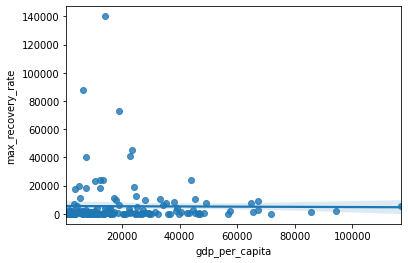

In [52]:
sns.regplot(x, y)

> ##### The result shows that the maximum recovery rate of a country is not affected by its GDP per capita (its development). The recovery rate in developed countries is not higher than in developing countries.